In [45]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as pltÇ
import seaborn as sns

In [46]:
# Load the CSV
df = pd.read_csv('../data/raw/FRONTUR/num_tourists_CCAA.csv', sep=';', encoding='latin1')
df.describe(include='all')

,Tipo de dato,Comunidades autónomas,Periodo,Total
count,464,464,464,464
unique,1,8,58,464
top,Dato base,Total,2025M06,9.476.248
freq,464,58,8,1


In [47]:
# Basic cleaning
df = df.drop(columns=['Tipo de dato'])

# Convert the 'Periodo' column to datetime type
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%YM%m')

# Convert the 'Total' column to numeric type
df['Total'] = df['Total'].str.replace('.', '').astype(float)

df

,Comunidades autónomas,Periodo,Total
0,Total,2025-06-01,9476248.0
1,Total,2025-05-01,9395612.0
2,Total,2025-04-01,8568142.0
3,Total,2025-03-01,6593604.0
4,Total,2025-02-01,5397279.0
...,...,...,...
459,Otras Comunidades Autónomas,2021-01-01,105428.0
460,Otras Comunidades Autónomas,2020-12-01,141951.0
461,Otras Comunidades Autónomas,2020-11-01,68811.0
462,Otras Comunidades Autónomas,2020-10-01,208085.0


In [48]:
df_total = df[df['Comunidades autónomas'] == 'Total']
df_total = df_total.set_index("Periodo").drop(columns=['Comunidades autónomas'])

df_total.head()

,Total
Periodo,
2025-06-01,9476248.0
2025-05-01,9395612.0
2025-04-01,8568142.0
2025-03-01,6593604.0
2025-02-01,5397279.0


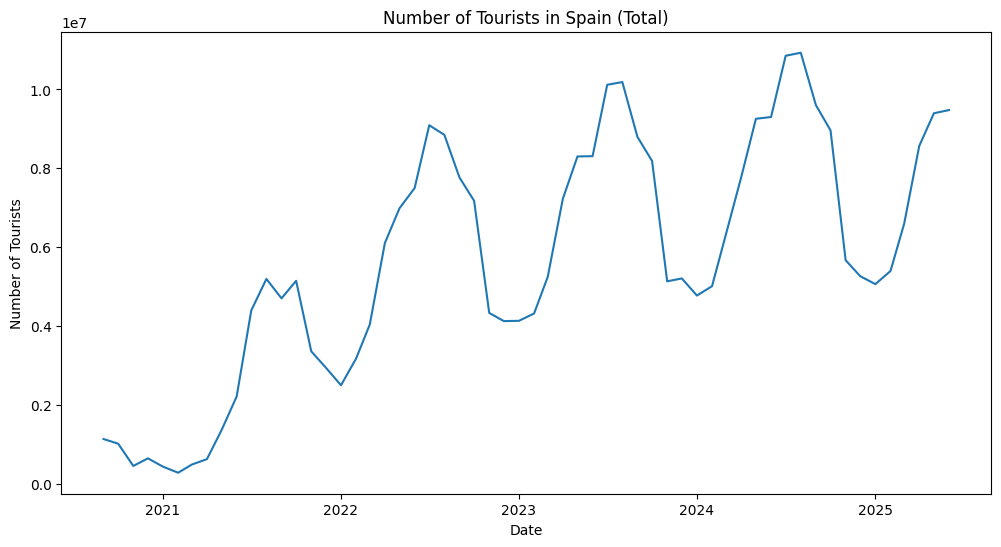

In [49]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total, x='Periodo', y='Total')
plt.title('Number of Tourists in Spain (Total)')
plt.xlabel('Date')
plt.ylabel('Number of Tourists')
plt.show()

In [50]:
# Sort the DataFrame by date
df_total = df_total.sort_index()

# Save the cleaned DataFrame
df_total.to_csv('../data/processed/num_tourists_total.csv', index=True, sep=';')

In [51]:
# (This cell is intentionally left blank for future analysis)